In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tfs
import itertools
import pandas as pd

import decoherence_tools

FONTSIZE=25
PEAK_THRESHOLD=1

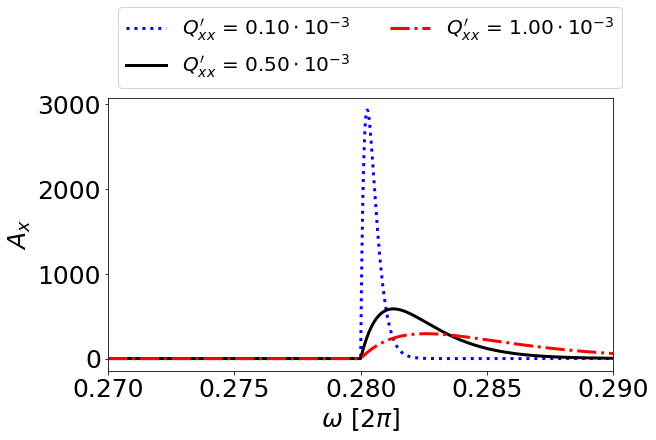

In [2]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6), constrained_layout=True)


freqs = np.linspace(0.27,0.30, 10001, endpoint=True)
jklm = '1100' # -> leads to tune H(1,0)

colors=['blue', 'black', 'red', 'orange', 'violet', 'cyan']
style=['dotted','solid', 'dashdot']

for i,qxx in enumerate([1e-4, 5e-4, 1e-3]):

    line_df = tfs.TfsDataFrame(
        data={'FREQUENCY': freqs}, 
        headers={
        'jklm':jklm,
        'AX':1.,
        'AY':0.,
        'QX0':0.28,
        'QY0':0.31,
        'QXX':qxx,
        'QXY':0.e-5,
        'QYX':0.e-5,
        'QYY':0.e-5,
    })

    line_df = decoherence_tools.process_df_and_add_spectral_amplitude(line_df)
    
    ax.plot(line_df['FREQUENCY'], line_df['SPECTRAL_AMPLITUDE_X'], linewidth=3, label=f'$ Q_{{xx}}^{{\prime}}$ = ${qxx*10**3:.2f} \cdot 10^{{-3}}$', color=colors[i], linestyle=style[i])

ax.set_xlim([0.27, 0.29])

ax.set_xlabel(r'$\omega~[2\pi]$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.set_xticks([0.27, 0.275, 0.28, 0.285, 0.29])
ax.set_ylabel(r'$A_x$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE-5, ncol=2, loc='lower left', bbox_to_anchor=(0.,1.))


plt.savefig('WEPL024_f1.png') 
plt.savefig('Tuneline_X_directdetuning_AX1_AY0.png') 
# plt.tight_layout()
plt.show()


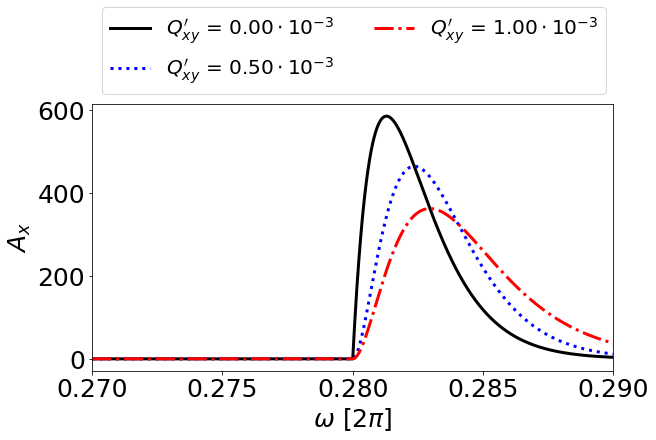

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6), constrained_layout=True)


freqs = np.linspace(0.27,0.30, 10001, endpoint=True)
jklm = '1100' # -> leads to tune H(1,0)

colors=['black', 'blue', 'red', 'orange', 'violet', 'cyan']
style=['solid', 'dotted','dashdot']

for i,qxy in enumerate([0, 5e-4, 1e-3]):
 
    line_df = tfs.TfsDataFrame(
        data={'FREQUENCY': freqs}, 
        headers={
        'jklm':jklm,
        'AX':1.,
        'AY':0.,
        'QX0':0.28,
        'QY0':0.31,
        'QXX':5.e-4,
        'QXY':qxy,
        'QYX':qxy,
        'QYY':0.e-5,
    })

    line_df = decoherence_tools.process_df_and_add_spectral_amplitude(line_df)
    
    ax.plot(line_df['FREQUENCY'], line_df['SPECTRAL_AMPLITUDE_X'], linewidth=3, label=f'$ Q_{{xy}}^{{\prime}}$ = ${qxy*10**3:.2f} \cdot 10^{{-3}}$', color=colors[i], linestyle=style[i])

ax.set_xlim([0.27, 0.29])

ax.set_xlabel(r'$\omega~[2\pi]$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.set_xticks([0.27, 0.275, 0.28, 0.285, 0.29])
ax.set_ylabel(r'$A_x$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE-5, ncol=2, loc='lower left', bbox_to_anchor=(0.,1.))


# plt.savefig('TuneSpread_crossdetuning.png')    
plt.savefig('WEPL024_f2.png')  
plt.savefig('Tuneline_X_poscrossdetuning_AX1_AY0.png')
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6), constrained_layout=True)


freqs = np.linspace(0.27,0.30, 10001, endpoint=True)
jklm = '1100' # -> leads to tune H(1,0)

colors=['black', 'blue', 'red', 'orange', 'violet', 'cyan']
style=['solid', 'dotted','dashdot']

for i,qxy in enumerate([0, -5e-4,  -1e-3]):

    line_df = tfs.TfsDataFrame(
        data={'FREQUENCY': freqs}, 
        headers={
        'jklm':jklm,
        'AX':1.,
        'AY':0.,
        'QX0':0.28,
        'QY0':0.31,
        'QXX':5.e-4,
        'QXY':qxy,
        'QYX':qxy,
        'QYY':0.e-5,
    })

    line_df = decoherence_tools.process_df_and_add_spectral_amplitude(line_df)
    
    ax.plot(line_df['FREQUENCY'], line_df['SPECTRAL_AMPLITUDE_X'], linewidth=3, label=f'$ Q_{{xy}}^{{\prime}}$ = ${qxy*10**3:.2f} \cdot 10^{{-3}}$', color=colors[i], linestyle=style[i])

ax.set_xlim([0.27, 0.29])

ax.set_xlabel(r'$\omega~[2\pi]$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.set_xticks([0.27, 0.275, 0.28, 0.285, 0.29])
ax.set_ylabel(r'$A_x$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE-5, ncol=2, loc='lower left', bbox_to_anchor=(0.,1.))


# plt.savefig('TuneSpread_crossdetuning.png')    
plt.savefig('WEPL024_f3.png')  
plt.savefig('Tuneline_X_negcrossdetuning_AX1_AY0.png')
plt.show()

In [5]:
def return_spectral_width(df):
    
    line_df = tfs.TfsDataFrame(
        data={'FREQUENCY': df['FREQS']}, 
        headers={
        'jklm':df['JKLM'],
        'AX':1.,
        'AY':0.,
        'QX0':0.28,
        'QY0':0.31,
        'QXX':df['QXX'],
        'QXY':df['QXY'],
        'QYX':df['QXY'],
        'QYY':df['QYY'],
    })
    line_df = decoherence_tools.process_df_and_add_spectral_amplitude(line_df)
    return pd.DataFrame(index=[0],data={'QXX': df['QXX'],
                                        'QXY': df['QXY'],
                                        'QYY': df['QYY'],
                                        'SIGMA_X': line_df.headers['FULL_SPECTRAL_WIDTH_X'],
                                        'SIGMA_Y': line_df.headers['FULL_SPECTRAL_WIDTH_Y'],
                                        'PEAK_X': line_df.headers['SPECTRAL_PEAK_X'],
                                        'PEAK_Y': line_df.headers['SPECTRAL_PEAK_Y']
                                       })    

In [6]:

freqs = np.linspace(0.26,0.33, 10001, endpoint=True)
jklm = '1100' # -> leads to tune H(1,0)

qxxs = 10**(np.linspace(-6, -3, 7, endpoint=True))
qxys = np.concatenate([
    10**(np.linspace(-5, -3, 3, endpoint=True)), 
    [0.0],
    -10**(np.linspace(-3, -5, 3, endpoint=True))
])

qyys=[0.0]


detuning = np.array(list(itertools.product(qxxs,qxys, qyys)))
process_df = pd.DataFrame(data={'QXX':detuning[:,0], 'QXY':detuning[:,1], 'QYY':detuning[:,2], 'JKLM':[jklm]*len(detuning), 'FREQS':[freqs]*len(detuning)})


df_1100 = decoherence_tools.multithreaded_iteration_through_df(process_df, return_spectral_width)


/eos/home-m/mihofer/SWAN_projects/Decoherence/decoherence_tools.py:98: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(exponent)*actions_product*bessel_functions
/eos/home-m/mihofer/SWAN_projects/Decoherence/decoherence_tools.py:124: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return scipy.integrate.quad(integrand_Ax, Imin, Imax, args=(w, jklm, amplitudes, tunes,), limit=1000000)[0] * j/divisor
/eos/home-m/mihofer/SWAN_projects/Decoherence/decoherence_tools.py:124: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return scipy.integrate.quad(integrand_Ax, Imin, Imax, args=(w, jklm, amplitudes, tunes,), limit=1000000)[0] * j/divisor
/eos/home-m/mihofer/SWAN_projects/Decoherence/decoherence_tools.py:124: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.


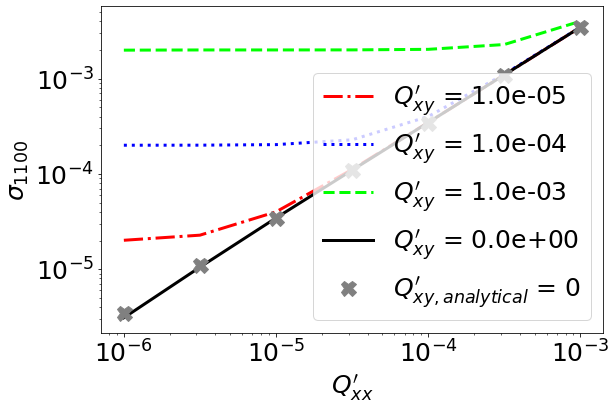

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

colors=['red', 'blue', 'lime', 'black', 'violet', 'cyan', 'black', 'pink']
style= ['dashdot', 'dotted', 'dashed', 'solid' ]


for i, qxy in enumerate(qxys):
    if qxy > -10**(-10):
        ax.plot(df_1100[df_1100['QXY']==qxy]['QXX'], df_1100[df_1100['QXY']==qxy]['SIGMA_X'], linewidth=3, label=f'$ Q_{{xy}}^{{\prime}}$ = {qxy:.1e}', color=colors[i], linestyle=style[i])


        
sigma_analytical = decoherence_tools.sigma_tune(qxxs, 1)
ax.plot(qxxs, sigma_analytical, linewidth=2, label=f'$ Q_{{xy, analytical}}^{{\prime}}$ = 0', color='grey', linestyle='None', marker='X', markersize=15)


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$ Q_{{xx}}^{{\prime}}$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.set_ylabel(r'$\sigma_{1100}$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE-5, ncol=2, loc='lower left', bbox_to_anchor=(0.,1.))

plt.savefig('WEPL024_f4.png') 
plt.savefig('Tuneline_width_X_poscrossdetuning_AX1_AY0.png')
plt.show()


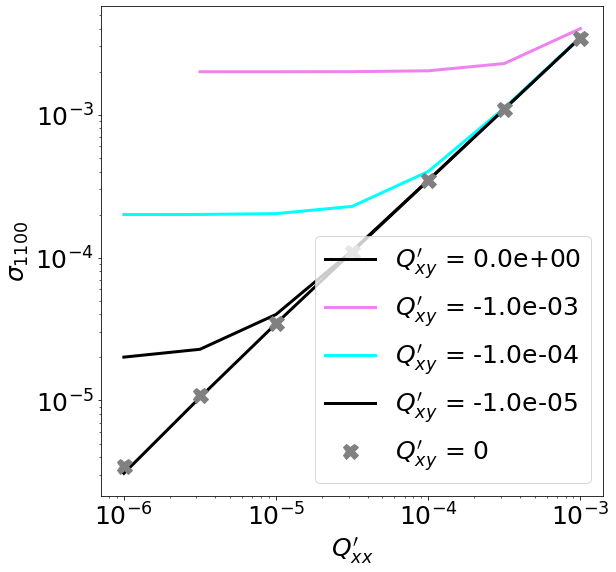

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

colors=['red', 'blue', 'lime', 'black', 'violet', 'cyan', 'black', 'pink']
style= ['dashdot', 'dotted', 'dashed', 'solid' ]


for i, qxy in enumerate(qxys):
    if qxy <10**(-10):
        ax.plot(df_1100[df_1100['QXY']==qxy]['QXX'], df_1100[df_1100['QXY']==qxy]['SIGMA_X'], linewidth=3, label=f'$ Q_{{xy}}^{{\prime}}$ = {qxy:.1e}', color=colors[i])


        
sigma_analytical = decoherence_tools.sigma_tune(qxxs, 1)
ax.plot(qxxs, sigma_analytical, linewidth=2, label=f'$ Q_{{xy}}^{{\prime}}$ = 0', color='grey', linestyle='None', marker='X', markersize=15)


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$ Q_{{xx}}^{{\prime}}$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.set_ylabel(r'$\sigma_{1100}$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE, loc='lower right', bbox_to_anchor=(1.0, 0.))

# plt.savefig('WEPL024_f4.png')    
plt.savefig('Tuneline_width_X_negcrossdetuning_AX1_AY0.png')
plt.show()


In [9]:
df_1100

,QXX,QXY,QYY,SIGMA_X,SIGMA_Y,PEAK_X,PEAK_Y
0,0.000001,0.00001,0.0,0.000020,0.0,64439.658851,NaN
1,0.000001,0.00010,0.0,0.000200,0.0,9286.185857,NaN
2,0.000001,0.00100,0.0,0.001990,0.0,990.100608,NaN
3,0.000001,0.00000,0.0,0.000003,0.0,177813.043021,NaN
4,0.000001,-0.00100,0.0,NaN,0.0,NaN,NaN
5,0.000001,-0.00010,0.0,0.000200,0.0,9705.899886,NaN
6,0.000001,-0.00001,0.0,0.000020,0.0,75120.634468,NaN
7,0.000003,0.00001,0.0,0.000023,0.0,45609.453070,NaN
8,0.000003,0.00010,0.0,0.000200,0.0,8492.947107,NaN
9,0.000003,0.00100,0.0,0.002000,0.0,974.355758,NaN


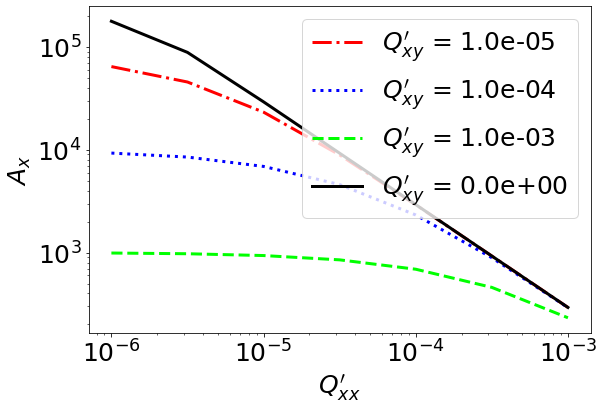

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

colors=['red', 'blue', 'lime', 'black', 'violet', 'cyan', 'black', 'pink']
style= ['dashdot', 'dotted', 'dashed', 'solid' ]

for i, qxy in enumerate(qxys):
    if qxy > -10**(-10):
        ax.plot(df_1100[df_1100['QXY']==qxy]['QXX'], df_1100[df_1100['QXY']==qxy]['PEAK_X'], linewidth=3, label=f'$ Q_{{xy}}^{{\prime}}$ = {qxy:.1e}', color=colors[i], linestyle=style[i])



ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$ Q_{{xx}}^{{\prime}}$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.set_ylabel(r'$A_x$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE-5, ncol=2, loc='lower left', bbox_to_anchor=(0.,1.))

plt.savefig('WEPL024_f5.png')    
plt.savefig('Tuneline_amplitude_X_poscrossdetuning_AX1_AY0.png')
plt.show()

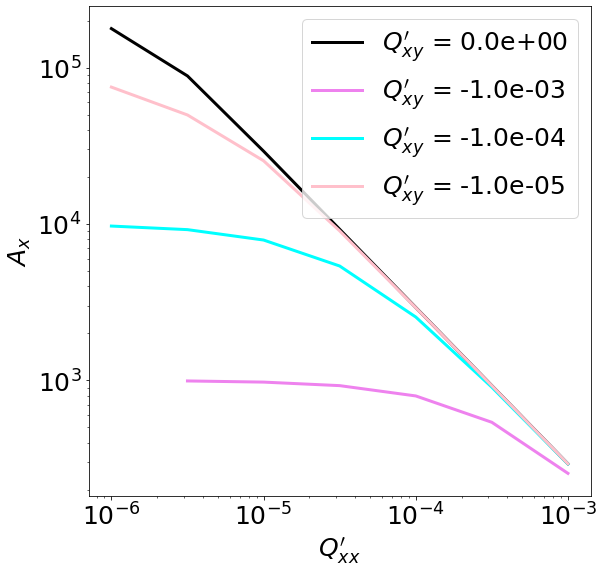

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

colors=['red', 'blue', 'lime', 'black', 'violet', 'cyan', 'pink']
style= ['dashdot', 'dotted', 'dashed', 'solid' ]

for i, qxy in enumerate(qxys):
    if qxy < 10**(-10):
        ax.plot(df_1100[df_1100['QXY']==qxy]['QXX'], df_1100[df_1100['QXY']==qxy]['PEAK_X'], linewidth=3, label=f'$ Q_{{xy}}^{{\prime}}$ = {qxy:.1e}', color=colors[i])



ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$ Q_{{xx}}^{{\prime}}$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.set_ylabel(r'$A_x$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE, loc='upper right')

# plt.savefig('WEPL024_f5.png')    
plt.savefig('Tuneline_amplitude_X_negcrossdetuning_AX1_AY0.png')
plt.show()

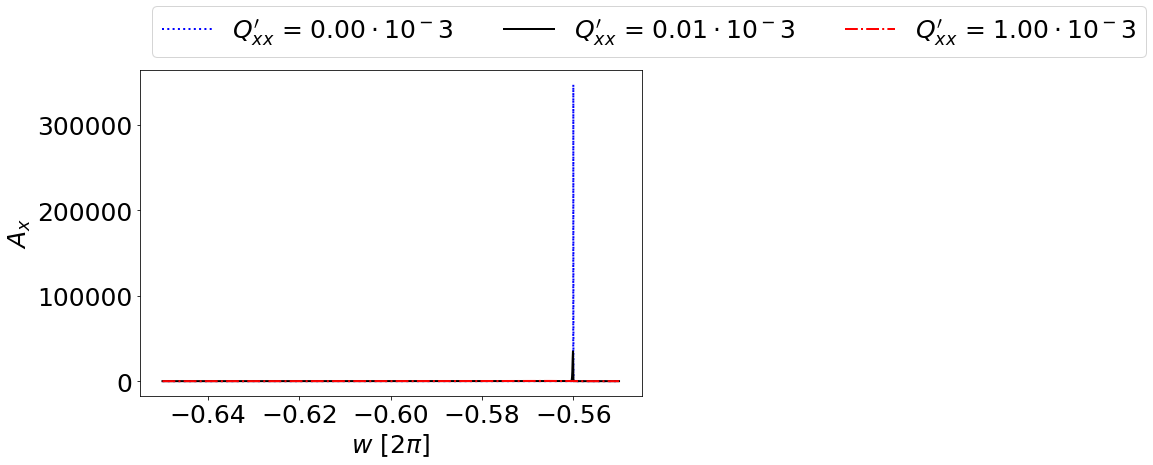

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))


freqs = freqs = np.linspace(-0.65,-0.55, 10001, endpoint=True)
jklm = '3000' # -> leads to tune H(1,0)

colors=['blue', 'black', 'red', 'orange', 'violet', 'cyan']
style=['dotted','solid', 'dashdot']

for i,qxx in enumerate([1e-6, 1e-5, 1e-3]):

    line_df = tfs.TfsDataFrame(
        data={'FREQUENCY': freqs}, 
        headers={
        'jklm':jklm,
        'AX':1.,
        'AY':0.,
        'QX0':0.28,
        'QY0':0.31,
        'QXX':qxx,
        'QXY':0.e-5,
        'QYX':0.e-5,
        'QYY':0.e-5,
    })

    line_df = decoherence_tools.process_df_and_add_spectral_amplitude(line_df)
    
    ax.plot(line_df['FREQUENCY'], line_df['SPECTRAL_AMPLITUDE_X'], linewidth=2, label=f'$ Q_{{xx}}^{{\prime}}$ = ${qxx*10**3:.2f} \cdot 10^{-3}$', color=colors[i], linestyle=style[i])

# ax.set_xlim([0.27, 0.29])

ax.set_xlabel(r'$w~[2\pi]$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
# ax.set_xticks([0.27, 0.275, 0.28, 0.285, 0.29])
ax.set_ylabel(r'$A_x$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE, ncol=3, loc='lower left', bbox_to_anchor=(0.,1.))

plt.savefig('3000line_X_directdetuning_AX1_AY0.png') 
plt.show()


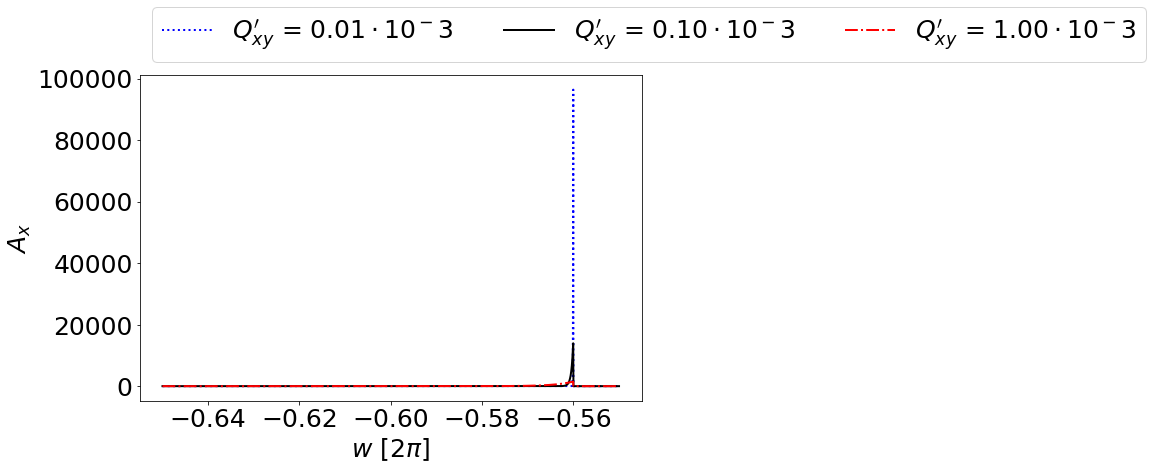

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))


freqs = freqs = np.linspace(-0.65,-0.55, 10001, endpoint=True)
jklm = '3000' # -> leads to tune H(1,0)

colors=['blue', 'black', 'red', 'orange', 'violet', 'cyan']
style=['dotted','solid', 'dashdot']

for i,qxy in enumerate([1e-5, 1e-4, 1e-3]):

    line_df = tfs.TfsDataFrame(
        data={'FREQUENCY': freqs}, 
        headers={
        'jklm':jklm,
        'AX':1.,
        'AY':0.,
        'QX0':0.28,
        'QY0':0.31,
        'QXX':1e-6,
        'QXY':qxy,
        'QYX':qxy,
        'QYY':0.e-5,
    })

    line_df = decoherence_tools.process_df_and_add_spectral_amplitude(line_df)
    
    ax.plot(line_df['FREQUENCY'], line_df['SPECTRAL_AMPLITUDE_X'], linewidth=2, label=f'$ Q_{{xy}}^{{\prime}}$ = ${qxy*10**3:.2f} \cdot 10^{-3}$', color=colors[i], linestyle=style[i])

# ax.set_xlim([0.27, 0.29])

ax.set_xlabel(r'$w~[2\pi]$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
# ax.set_xticks([0.27, 0.275, 0.28, 0.285, 0.29])
ax.set_ylabel(r'$A_x$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE, ncol=3, loc='lower left', bbox_to_anchor=(0.,1.))

plt.savefig('3000line_X_poscrossdetuning_AX1_AY0.png') 
plt.show()


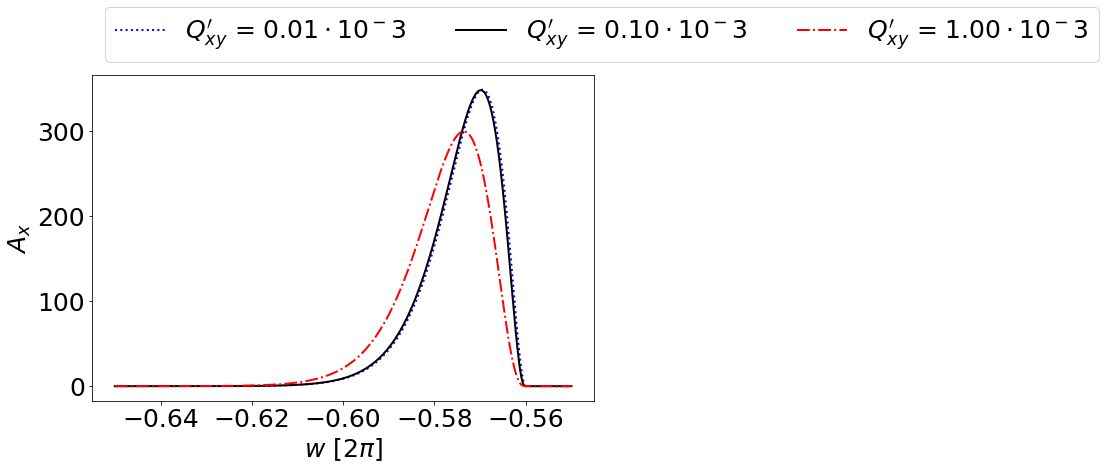

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))


freqs = freqs = np.linspace(-0.65,-0.55, 10001, endpoint=True)
jklm = '3000' # -> leads to tune H(1,0)

colors=['blue', 'black', 'red', 'orange', 'violet', 'cyan']
style=['dotted','solid', 'dashdot']

for i,qxy in enumerate([1e-5, 1e-4, 1e-3]):

    line_df = tfs.TfsDataFrame(
        data={'FREQUENCY': freqs}, 
        headers={
        'jklm':jklm,
        'AX':1.,
        'AY':0.,
        'QX0':0.28,
        'QY0':0.31,
        'QXX':1e-3,
        'QXY':qxy,
        'QYX':qxy,
        'QYY':0.e-5,
    })

    line_df = decoherence_tools.process_df_and_add_spectral_amplitude(line_df)
    
    ax.plot(line_df['FREQUENCY'], line_df['SPECTRAL_AMPLITUDE_X'], linewidth=2, label=f'$ Q_{{xy}}^{{\prime}}$ = ${qxy*10**3:.2f} \cdot 10^{-3}$', color=colors[i], linestyle=style[i])

# ax.set_xlim([0.27, 0.29])

ax.set_xlabel(r'$w~[2\pi]$', fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
# ax.set_xticks([0.27, 0.275, 0.28, 0.285, 0.29])
ax.set_ylabel(r'$A_x$', fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE, ncol=3, loc='lower left', bbox_to_anchor=(0.,1.))

plt.savefig('3000line_X_negcrossdetuning_AX1_AY0.png') 
plt.show()



In [15]:
def return_spectral_width(df):
    
    line_df = tfs.TfsDataFrame(
        data={'FREQUENCY': df['FREQS']}, 
        headers={
        'jklm':df['JKLM'],
        'AX':1.,
        'AY':0.,
        'QX0':0.28,
        'QY0':0.31,
        'QXX':df['QXX'],
        'QXY':df['QXY'],
        'QYX':df['QXY'],
        'QYY':df['QYY'],
    })
    line_df = decoherence_tools.process_df_and_add_spectral_amplitude(line_df)
    return pd.DataFrame(index=[0],data={'QXX': df['QXX'],
                                        'QXY': df['QXY'],
                                        'QYY': df['QYY'],
                                        'SIGMA_X': line_df.headers['FULL_SPECTRAL_WIDTH_X'],
                                        'SIGMA_Y': line_df.headers['FULL_SPECTRAL_WIDTH_Y'],
                                        'PEAK_X': line_df.headers['SPECTRAL_PEAK_X'],
                                        'PEAK_Y': line_df.headers['SPECTRAL_PEAK_Y']
                                       })  

In [16]:


freqs = np.linspace(-0.65,-0.55, 10001, endpoint=True)
jklm = '3000' # -> leads to tune H(-2,0)

qxxs = 10**(np.linspace(-6, -3, 7, endpoint=True))
qxys = np.concatenate([
    10**(np.linspace(-5, -3, 3, endpoint=True)), 
    [0.0],
    -10**(np.linspace(-3, -5, 3, endpoint=True))
])

qyys=[0.0]



detuning = np.array(list(itertools.product(qxxs,qxys, qyys)))
process_df = pd.DataFrame(data={'QXX':detuning[:,0], 'QXY':detuning[:,1], 'QYY':detuning[:,2], 'JKLM':[jklm]*len(detuning), 'FREQS':[freqs]*len(detuning)})


df_3000 = decoherence_tools.multithreaded_iteration_through_df(process_df, return_spectral_width)

/eos/home-m/mihofer/SWAN_projects/Decoherence/decoherence_tools.py:98: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(exponent)*actions_product*bessel_functions
/eos/home-m/mihofer/SWAN_projects/Decoherence/decoherence_tools.py:124: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return scipy.integrate.quad(integrand_Ax, Imin, Imax, args=(w, jklm, amplitudes, tunes,), limit=1000000)[0] * j/divisor
/eos/home-m/mihofer/SWAN_projects/Decoherence/decoherence_tools.py:124: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return scipy.integrate.quad(integrand_Ax, Imin, Imax, args=(w, jklm, amplitudes, tunes,), limit=1000000)[0] * j/divisor


In [55]:
FONTSIZE=35
LINEWIDTH=4

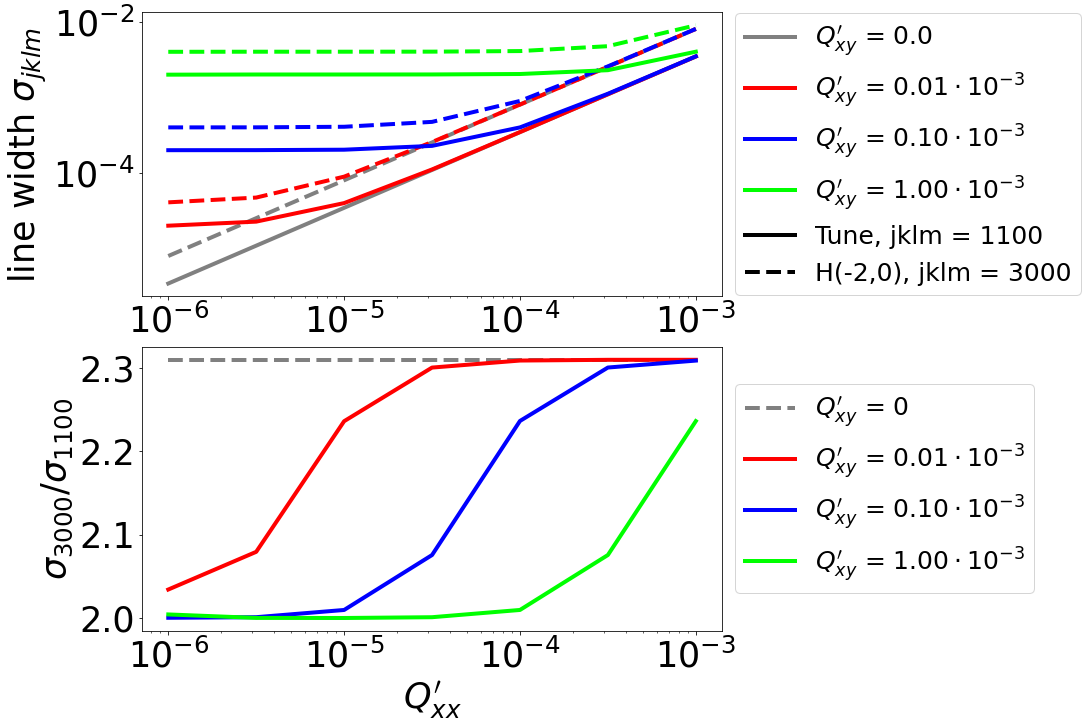

In [59]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10), constrained_layout=True)

colors=['red', 'blue', 'lime', 'orange', 'violet', 'cyan', 'black', 'pink']

    
sigma_analytical_1100 = decoherence_tools.sigma_tune(qxxs, 1)
a,=ax[0].plot(qxxs, sigma_analytical_1100, linewidth=LINEWIDTH, label=f'$ Q_{{xy}}^{{\prime}}$ = 0', color='grey')

sigma_analytical_3000 = decoherence_tools.sigma_sext(qxxs, 1)
b,=ax[0].plot(qxxs, sigma_analytical_3000, linewidth=LINEWIDTH, label=f'$ Q_{{xy}}^{{\prime}}$ = 0', color='grey', linestyle='--')

plots=[(a,b)]
for i, qxy in enumerate(qxys):
    if qxy > 10**(-10):
        a,=ax[0].plot(df_1100[df_1100['QXY']==qxy]['QXX'], df_1100[df_1100['QXY']==qxy]['SIGMA_X'], linewidth=LINEWIDTH, color=colors[i])    
        b,=ax[0].plot(df_3000[df_3000['QXY']==qxy]['QXX'], df_3000[df_3000['QXY']==qxy]['SIGMA_X'], linewidth=LINEWIDTH, color=colors[i], linestyle='--')
        plots.append((a,b))
  

ax[0].set_xscale('log')
ax[0].set_yscale('log')


ax[0].tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax[0].set_ylabel(r'line width $\sigma_{jklm}$', fontsize=FONTSIZE)

labels= (f'$ Q_{{xy}}^{{\prime}}$ = 0.0',) + tuple(f'$ Q_{{xy}}^{{\prime}}$ = ${qxy*10**3:.2f} \cdot 10^{{-3}}$' for qxy in qxys if qxy > 10**(-10)) + ('Tune, jklm = 1100',) + ('H(-2,0), jklm = 3000',)
cont,=ax[0].plot([], [], linewidth=LINEWIDTH, color='black', linestyle='-', label='Tune')
dotted,= ax[0].plot([], [], linewidth=LINEWIDTH, color='black', linestyle='--', label='H(-2,0')


ax[0].legend(plots+[cont]+[dotted],
             labels,
            fontsize=FONTSIZE-10,
            loc='center left',
            bbox_to_anchor=(1.0,0.5),
            ncol=1
           )  



ax[1].plot(qxxs, sigma_analytical_3000/sigma_analytical_1100, linewidth=LINEWIDTH, label=f'$ Q_{{xy}}^{{\prime}}$ = 0', color='grey', linestyle='--')
for i, qxy in enumerate(qxys):
    if qxy > 10**(-10):
        ax[1].plot(df_1100[df_1100['QXY']==qxy]['QXX'], df_3000[df_3000['QXY']==qxy]['SIGMA_X']/df_1100[df_1100['QXY']==qxy]['SIGMA_X'], linewidth=LINEWIDTH, color=colors[i], label=f'$ Q_{{xy}}^{{\prime}}$ = ${qxy*10**3:.2f} \cdot 10^{{-3}}$')


    
ax[1].set_xscale('log')


ax[1].set_xlabel(r'$ Q_{{xx}}^{{\prime}}$', fontsize=FONTSIZE)
ax[1].tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax[1].set_ylabel(r'$\sigma_{3000} / \sigma_{1100}$', fontsize=FONTSIZE)
ax[1].legend(fontsize=FONTSIZE-10,
            loc='center left',
            bbox_to_anchor=(1.0,0.5),
            ncol=1)


plt.savefig('WEPL024_f6.png')  
plt.savefig('Comparison_width_X_poscrossdetuning_AX1_AY0.png')
plt.show()

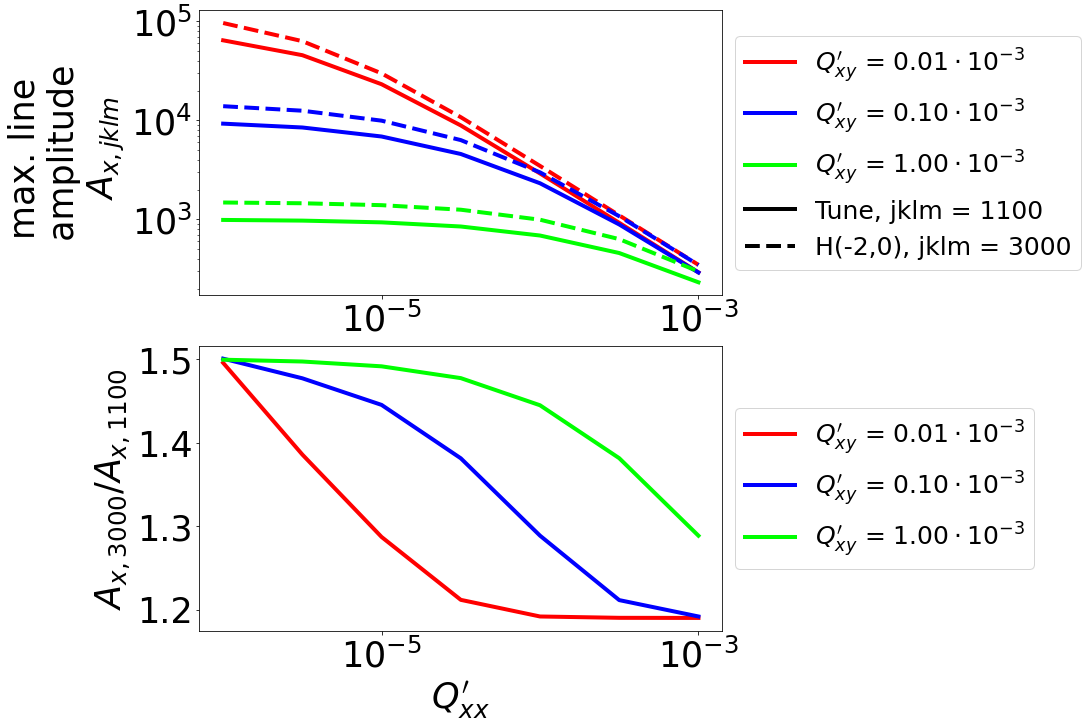

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10), constrained_layout=True)

colors=['red', 'blue', 'lime', 'orange', 'violet', 'cyan', 'black', 'pink']

    

plots=[]
for i, qxy in enumerate(qxys):
    if qxy > 10**(-10):
        a,=ax[0].plot(df_1100[df_1100['QXY']==qxy]['QXX'], df_1100[df_1100['QXY']==qxy]['PEAK_X'], linewidth=LINEWIDTH, color=colors[i])    
        b,=ax[0].plot(df_3000[df_3000['QXY']==qxy]['QXX'], df_3000[df_3000['QXY']==qxy]['PEAK_X'], linewidth=LINEWIDTH, color=colors[i], linestyle='--')
        plots.append((a,b))
  

ax[0].set_xscale('log')
ax[0].set_yscale('log')


ax[0].tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax[0].set_ylabel('max. line \n amplitude \n'+r' $A_{x,jklm}$', fontsize=FONTSIZE)

labels= tuple(f'$ Q_{{xy}}^{{\prime}}$ = ${qxy*10**3:.2f} \cdot 10^{{-3}}$' for qxy in qxys if qxy > 10**(-10)) + ('Tune, jklm = 1100',) + ('H(-2,0), jklm = 3000',)
cont,=ax[0].plot([], [], linewidth=LINEWIDTH, color='black', linestyle='-', label='Tune')
dotted,= ax[0].plot([], [], linewidth=LINEWIDTH, color='black', linestyle='--', label='H(-2,0')


ax[0].legend(plots+[cont]+[dotted],
             labels,
            fontsize=FONTSIZE-10,
            loc='center left',
            bbox_to_anchor=(1.0,0.5),
            ncol=1
           )  




for i, qxy in enumerate(qxys):
    if qxy > 10**(-10):
        ax[1].plot(df_1100[df_1100['QXY']==qxy]['QXX'], df_3000[df_3000['QXY']==qxy]['PEAK_X']/df_1100[df_1100['QXY']==qxy]['PEAK_X'], linewidth=LINEWIDTH, color=colors[i], label=f'$ Q_{{xy}}^{{\prime}}$ = ${qxy*10**3:.2f} \cdot 10^{{-3}}$')


    
ax[1].set_xscale('log')


ax[1].set_xlabel(r'$ Q_{{xx}}^{{\prime}}$', fontsize=FONTSIZE)
ax[1].tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax[1].set_ylabel(r'$A_{x,3000} / A_{x,1100}$', fontsize=FONTSIZE)
ax[1].legend(fontsize=FONTSIZE-10,
            loc='center left',
            bbox_to_anchor=(1.0,0.5),
            ncol=1)


plt.savefig('WEPL024_f7.png')    
plt.savefig('Comparison_amplitude_X_poscrossdetuning_AX1_AY0.png')
plt.show()